In [1]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from torchvision import transforms,datasets,models,utils
from torchinfo import summary 
from torch.utils.data import DataLoader
import time 
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import  pandas as pd
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from PIL import Image

In [2]:
#对三个集进行定义transform
image_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(size=300,scale=(0.8,1.1)),#随机长宽比裁剪图片,结果图片会在0.8到1.1倍之间
        transforms.RandomRotation(degrees = 10), #根据degress随机旋转一定角度 ,也可以设置一个括号两个数，设置一个范围
        transforms.ColorJitter(0.4,0.4,0.4),#修改亮度，对比度和饱和度
        transforms.RandomHorizontalFlip(),#水平翻转
        transforms.CenterCrop(size = 256), #根据给定的size从中心裁剪，写了两个数的话就是高和宽
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],#mean
                            [0.229, 0.224, 0.225]) #std
    ]),
    
    'val':transforms.Compose([
        transforms.Resize(300),
        transforms.CenterCrop(256),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                            [0.229, 0.224, 0.225])
    ]),
    
    'test':transforms.Compose([
        transforms.Resize(300),
        transforms.CenterCrop(256),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                            [0.229, 0.224, 0.225])
    ])
}

In [3]:
#记载数据集
#路径
train_dir = r'C:\Users\user\DL\Torch_study\chest_xray\train'
val_dir = r'C:\Users\user\DL\Torch_study\chest_xray\val'
test_dir = r'C:\Users\user\DL\Torch_study\chest_xray\test'

datasets = {
    'train': datasets.ImageFolder(train_dir, transform=image_transforms['train']),
    'val':datasets.ImageFolder(val_dir, transform=image_transforms['val']),
    'test':datasets.ImageFolder(test_dir, transform=image_transforms['test'])
}

BATCH_SIZE = 32 #每批读取128图片

#Data Loader：创建iterator，批量读取
dataloaders={
    'train':DataLoader(datasets['train'],batch_size=BATCH_SIZE,shuffle="True"),
    'val':DataLoader(datasets['val'],batch_size=BATCH_SIZE,shuffle="True"),
    'test':DataLoader(datasets['test'],batch_size=BATCH_SIZE,shuffle="True")
    
}

LABEL = dict((v,k) for k,v in datasets['train'].class_to_idx.items())

LABEL

{0: 'NORMAL', 1: 'PNEUMONIA'}

In [4]:
#检查信息
dataloaders['train'].dataset

Dataset ImageFolder
    Number of datapoints: 5216
    Root location: C:\Users\user\DL\Torch_study\chest_xray\train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(300, 300), scale=(0.8, 1.1), ratio=(0.75, 1.3333), interpolation=bilinear)
               RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
               ColorJitter(brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.6, 1.4], hue=None)
               RandomHorizontalFlip(p=0.5)
               CenterCrop(size=(256, 256))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [5]:
dataloaders['train'].dataset.classes

['NORMAL', 'PNEUMONIA']

In [6]:
dataloaders['train'].dataset.root

'C:\\Users\\user\\DL\\Torch_study\\chest_xray\\train'

In [7]:
#肺部正常图片
files_normal = os.listdir(os.path.join(str(dataloaders['train'].dataset.root),'NORMAL'))
files_normal

['IM-0115-0001.jpeg',
 'IM-0117-0001.jpeg',
 'IM-0119-0001.jpeg',
 'IM-0122-0001.jpeg',
 'IM-0125-0001.jpeg',
 'IM-0127-0001.jpeg',
 'IM-0128-0001.jpeg',
 'IM-0129-0001.jpeg',
 'IM-0131-0001.jpeg',
 'IM-0133-0001.jpeg',
 'IM-0135-0001.jpeg',
 'IM-0137-0001.jpeg',
 'IM-0140-0001.jpeg',
 'IM-0141-0001.jpeg',
 'IM-0143-0001.jpeg',
 'IM-0145-0001.jpeg',
 'IM-0147-0001.jpeg',
 'IM-0149-0001.jpeg',
 'IM-0151-0001.jpeg',
 'IM-0152-0001.jpeg',
 'IM-0154-0001.jpeg',
 'IM-0156-0001.jpeg',
 'IM-0158-0001.jpeg',
 'IM-0160-0001.jpeg',
 'IM-0162-0001.jpeg',
 'IM-0164-0001.jpeg',
 'IM-0166-0001.jpeg',
 'IM-0168-0001.jpeg',
 'IM-0170-0001.jpeg',
 'IM-0172-0001.jpeg',
 'IM-0176-0001.jpeg',
 'IM-0177-0001.jpeg',
 'IM-0178-0001.jpeg',
 'IM-0180-0001.jpeg',
 'IM-0182-0001.jpeg',
 'IM-0183-0001.jpeg',
 'IM-0185-0001.jpeg',
 'IM-0187-0001.jpeg',
 'IM-0189-0001.jpeg',
 'IM-0191-0001.jpeg',
 'IM-0193-0001.jpeg',
 'IM-0195-0001.jpeg',
 'IM-0199-0001.jpeg',
 'IM-0201-0001.jpeg',
 'IM-0203-0001.jpeg',
 'IM-0205-

In [8]:
dataloaders['val'].dataset

Dataset ImageFolder
    Number of datapoints: 16
    Root location: C:\Users\user\DL\Torch_study\chest_xray\val
    StandardTransform
Transform: Compose(
               Resize(size=300, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(256, 256))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


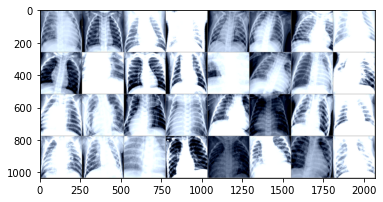

In [9]:
from torch.utils.tensorboard import SummaryWriter #向事件文件写入事件和概要

log_path = '.\logdir'

def tb_writter():
    timestr = time.strftime("%Y%m%d_%H%M%S")
    writter = SummaryWriter(log_path+timestr)
    return writter

writer = tb_writter()

#获取到一批数据
images,labels = next(iter(dataloaders['train']))

#定义图片显示方法
def imshow(img):
    img = img/2 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img,(1,2,0))) 
    plt.show()

grid = utils.make_grid(images) #将若干图像拼成一幅
imshow(grid) 

writer.add_image('X-Ray grid',grid,0)

writer.flush() #把事件写入磁盘

In [10]:
#获取一张图片
dataloaders['train'].dataset[4]  #返回：tensor，label

(tensor([[[-0.8335, -0.7822, -0.7479,  ..., -1.1589, -1.2103, -1.2103],
          [-0.8335, -0.8164, -0.7822,  ..., -1.1418, -1.1932, -1.1932],
          [-0.8507, -0.8678, -0.8507,  ..., -1.1589, -1.1932, -1.2103],
          ...,
          [ 0.1426,  0.1939,  0.2453,  ..., -1.8097, -1.8097, -1.8097],
          [ 0.1939,  0.2111,  0.2453,  ..., -1.8097, -1.8097, -1.8097],
          [ 0.1939,  0.2282,  0.2624,  ..., -1.8097, -1.8097, -1.8097]],
 
         [[-0.7227, -0.6702, -0.6352,  ..., -1.0553, -1.1078, -1.1078],
          [-0.7227, -0.7052, -0.6702,  ..., -1.0378, -1.0903, -1.0903],
          [-0.7402, -0.7577, -0.7402,  ..., -1.0553, -1.0903, -1.1078],
          ...,
          [ 0.2752,  0.3277,  0.3803,  ..., -1.7206, -1.7206, -1.7206],
          [ 0.3277,  0.3452,  0.3803,  ..., -1.7206, -1.7206, -1.7206],
          [ 0.3277,  0.3627,  0.3978,  ..., -1.7206, -1.7206, -1.7206]],
 
         [[-0.4973, -0.4450, -0.4101,  ..., -0.8284, -0.8807, -0.8807],
          [-0.4973, -0.4798,

Label: NORMAL


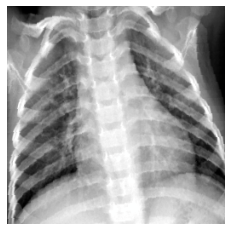

In [11]:
#通过transform后的tensor识别
def show_sample(img,label):
    print("Label:",dataloaders['train'].dataset.classes[label])
    img = img.numpy().transpose((1,2,0))
    mean = np.array([0.485,0.456,0.406])
    std = np.array([0.229,0.224,0.225])
    img = img*std + mean
    img = np.clip(img,0,1)
    plt.imshow(img)
    plt.axis('off')
    
show_sample(*dataloaders['train'].dataset[4])

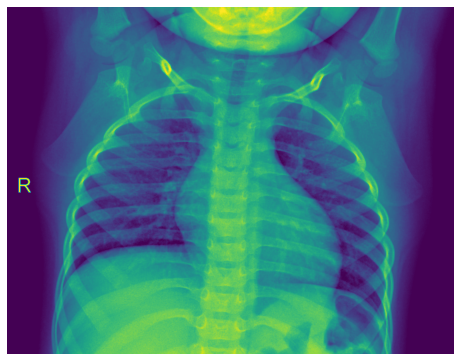

In [12]:
#直接从原图片文件获得
def show_image(img):
    plt.figure(figsize=(8,8))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
one_img = Image.open(dataloaders['train'].dataset.root+r'\NORMAL\IM-0239-0001.jpeg')

show_image(one_img)

In [13]:
#记录错误分类的图片
def misclassified_image(pred,writer,target,images,output,epoch,count=10):
    misclassified = (pred != target.data)
    for index,image_tensor in enumerate(images[misclassified][:count]):
        img_name = 'Epoch:{}-->predict:{}-->Actual:{}'.format(epoch,LABEL[pred[misclassified].tolist()[index]],
                                                             LABEL[target.data[misclassified].tolist()[index]])
        writer.add_image(img_name,image_tensor,epoch)

In [14]:
#自定义池化层
class AdaptiveConcatPool2d(nn.Module):
    def __init__(self,size=None):
        super(AdaptiveConcatPool2d,self).__init__()
        size = size or (1,1) #kernal大小
        self.avgPooling = nn.AdaptiveAvgPool2d(size)
        self.maxPooling = nn.AdaptiveMaxPool2d(size)
    def forward(self,x):
        return torch.cat([self.maxPooling(x),self.avgPooling(x)],dim=1) #拼接两层

In [15]:
#迁移学习，获取训练模型，并替换池化层和全连接层
def get_model():
    model = models.resnet50(pretrained=True)
    #冻结模型参数
    for param in model.parameters():
        param.requires_grad = False
    #替换最后两层，池化层和全连接层
    model.avgpool = AdaptiveConcatPool2d()
    #全连接层
    model.fc = nn.Sequential(
        nn.Flatten(),#拉平
        nn.BatchNorm1d(4096),#加速神经网络收敛过程，提高稳定性
        nn.Dropout(0.5), #丢掉部分神经元
        nn.Linear(4096,512),#全连接层
        nn.ReLU(),#激活函数
        nn.BatchNorm1d(512),
        nn.Dropout(0.5),
        nn.Linear(512,2), #两个输出
        nn.LogSoftmax(dim=1) #损失函数
    )
    return model

In [16]:
#定义训练函数
def train_val(model,device,train_loader,val_loader,optimizer,criterion,epoch,writer):
    model.train()
    total_loss = 0.0
    val_loss = 0.0
    val_acc = 0 
    for batch_id,(images,labels) in enumerate(train_loader):
        images,labels = images.to(device),labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * images.size(0)
    train_loss = total_loss/len(train_loader.dataset)
    writer.add_scalar('Training Loss',total_loss / len(train_loader.dataset),epoch)
    writer.flush()
    
    model.eval()
    with torch.no_grad():
        for images,labels in val_loader:
            images,labels = images.to(device),labels.to(device)
            outputs = model(images)
            loss = criterion(outputs,labels)
            val_loss += loss.item() * images.size(0)
            _,pred = torch.max(outputs,dim=1) #获取醉倒概率的索引
            correct = pred.eq(labels.view_as(pred))
            accuracy = torch.mean(correct.type(torch.FloatTensor))
            val_acc += accuracy.item()*images.size(0)
        val_loss = val_loss / len(val_loader.dataset)
        val_acc = val_acc / len(val_loader.dataset)
        
    return train_loss,val_loss,val_acc

In [17]:
#定义测试函数
def test(model,device,test_loader,criterion,epoch,writer):
    model.eval()
    total_loss = 0.0
    correct = 0.0
    with torch.no_grad():
        for batch_id,(images,labels) in enumerate(test_loader):
            images,labels = images.to(device),labels.to(device)
            outputs = model(images)
            loss = criterion(outputs,labels)
            total_loss += loss.item()
            _,pred = torch.max(outputs,dim=1)
            correct = pred.eq(labels.view_as(pred)).sum().item()
            misclassified_image(pred,writer,labels,images,outputs,epoch)
        avg_loss = total_loss / len(test_loader.dataset)
        accuracy = 100*correct / len(test_loader.dataset)
        
        writer.add_scalar("Test Loss",total_loss,epoch)
        writer.add_scalar("Accuracy",accuracy,epoch)
        writer.flush()
        return total_loss,accuracy

In [18]:
#定义训练流程
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device.type)

model = get_model().to(device)

criterion = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(),lr=0.001)

# 定义训练流程函数
def train_epochs(model, device, dataloaders, criterion, optimizer, epochs, writer):
    # 输出信息
    print("{0:>15} | {1:>15} | {2:>15} | {3:>15} | {4:>15} | {5:>15}".format('Epoch', 'Train Loss', 'val_loss', 'val_acc', 'Test Loss', 'Test_acc'))
    # 初始最小的损失
    best_loss = np.inf
    # 开始训练、测试
    for epoch in range(epochs):
        # 训练，return: loss
        train_loss, val_loss, val_acc = train_val(model, device, dataloaders['train'], dataloaders['val'], optimizer, criterion, epoch, writer)
        # 测试，return: loss + accuracy
        test_loss, test_acc = test(model, device, dataloaders['test'], criterion, epoch, writer)
        # 判断损失是否最小
        if test_loss < best_loss:
            best_loss = test_loss # 保存最小损失
            # 保存模型
            torch.save(model.state_dict(), 'model.pth')
        # 输出结果
        print("{0:>15} | {1:>15} | {2:>15} | {3:>15} | {4:>15} | {5:>15}".format(epoch, train_loss, val_loss, val_acc, test_loss, test_acc))
        writer.flush()

C:\Users\user\anaconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9020). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:115.)
  return torch._C._cuda_getDeviceCount() > 0


cpu


In [19]:
# 调用函数
epochs=3
train_epochs(model, device, dataloaders, criterion, optimizer, epochs, writer)
writer.close()

          Epoch |      Train Loss |        val_loss |         val_acc |       Test Loss |        Test_acc


C:\Users\user\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


              0 | 0.58330309427589 | 0.38109731674194336 |            0.75 | 8.827314406633377 | 1.6025641025641026
              1 | 0.45540353930069627 | 0.33687955141067505 |          0.8125 | 7.81932458281517 | 2.2435897435897436
              2 | 0.4134293053230625 | 0.33532285690307617 |          0.8125 | 7.453520238399506 | 2.0833333333333335


In [20]:
def plot_confusion(cm):
    plt.figure()
    plot_confusion_matrix(cm, figsize=(12, 8), cmap=plt.cm.Blues) # 参数设置
    plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=14)
    plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=14)
    plt.xlabel('Predicted Label', fontsize=16)
    plt.ylabel('True Label', fontsize=16)
    plt.show()

In [21]:
def accuracy(outputs, labels):
    # 计算正确率
    _, preds = torch.max(outputs, dim=1)
    correct = torch.tensor(torch.sum(preds == labels).item() / len(preds))
    return correct

In [22]:
def metrics(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    # precision, recall, F1
    # 混淆矩阵
    cm = confusion_matrix(labels.cpu().numpy(), preds.cpu().numpy())
    # 绘制混淆矩阵
    plot_confusion(cm) 
    # 获取tn, fp, fn, tp
    tn, fp, fn, tp = cm.ravel()
    # 精准率
    precision = tp / (tp + fp)
    # 召回率
    recall = tp / (tp + fn)
    # f1 score
    f1 = 2 * ((precision * recall) / (precision + recall))
    return precision, recall, f1

<Figure size 432x288 with 0 Axes>

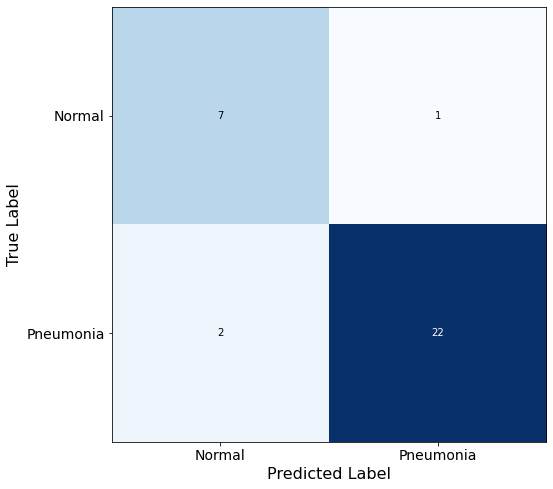

<Figure size 432x288 with 0 Axes>

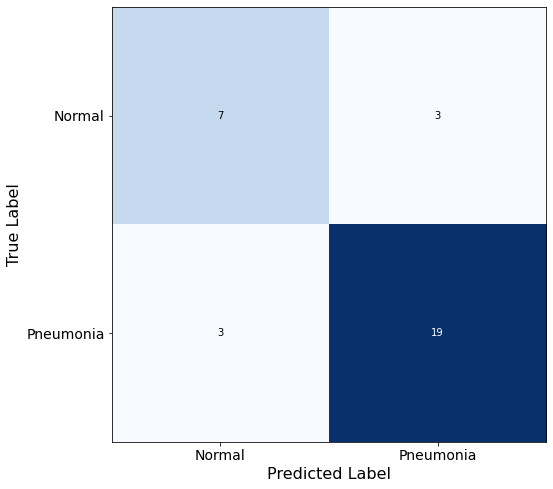

<Figure size 432x288 with 0 Axes>

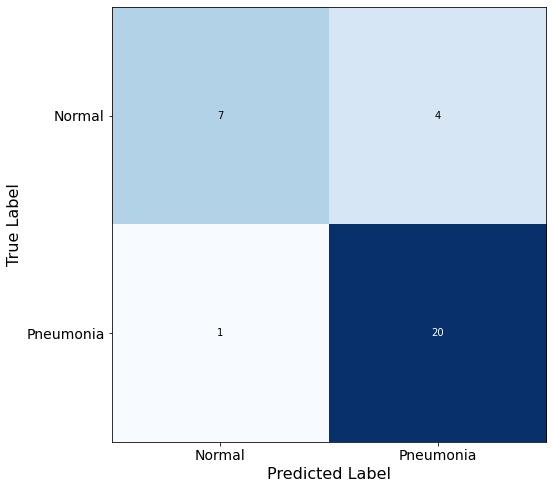

<Figure size 432x288 with 0 Axes>

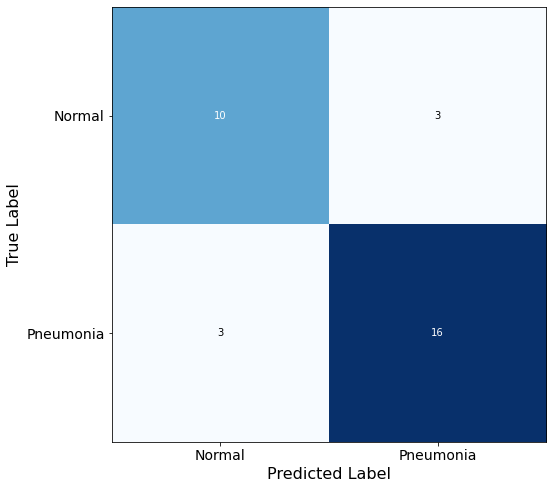

<Figure size 432x288 with 0 Axes>

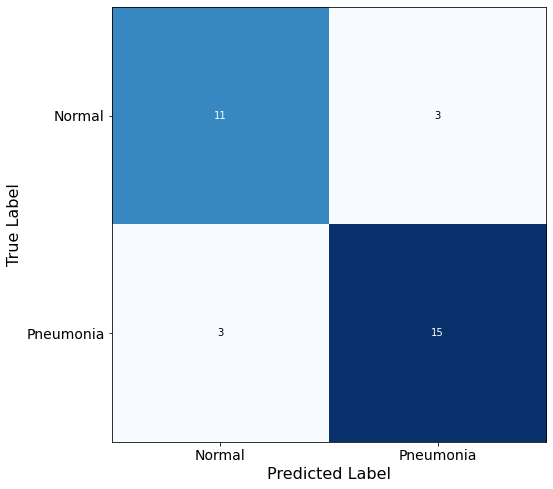

<Figure size 432x288 with 0 Axes>

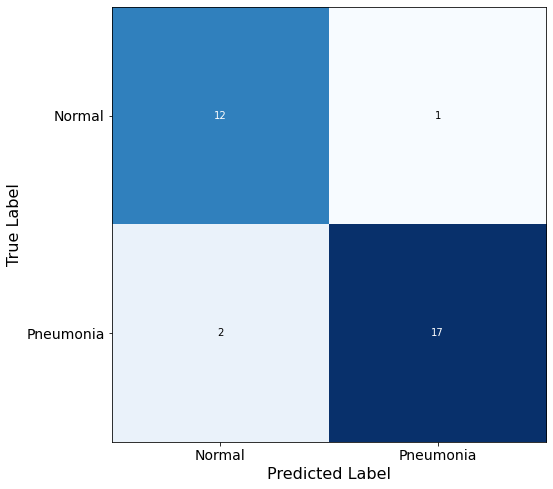

<Figure size 432x288 with 0 Axes>

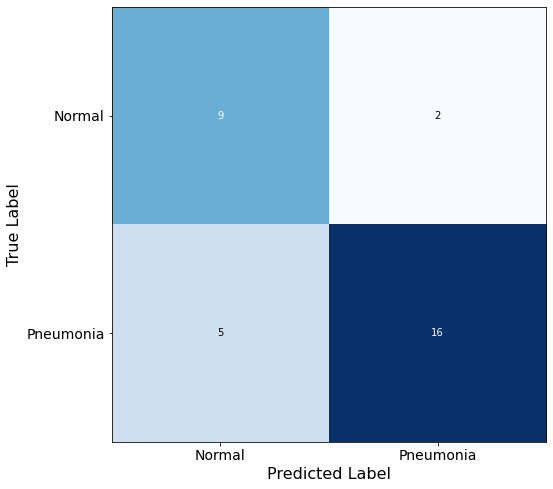

<Figure size 432x288 with 0 Axes>

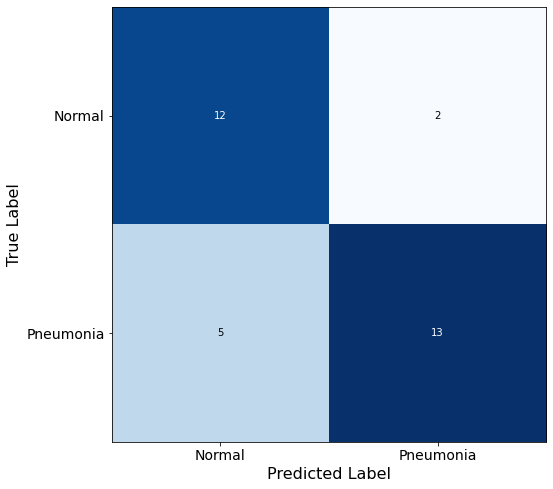

<Figure size 432x288 with 0 Axes>

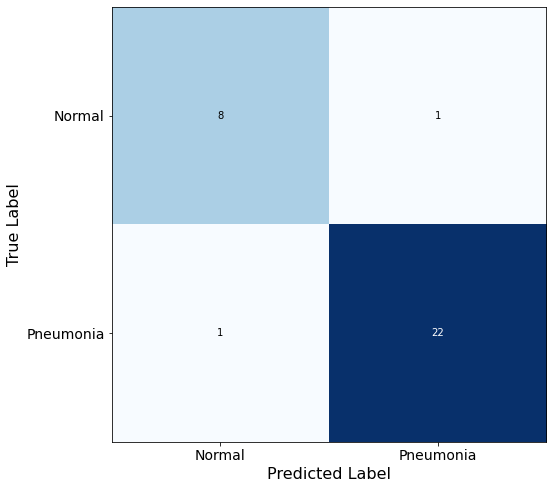

<Figure size 432x288 with 0 Axes>

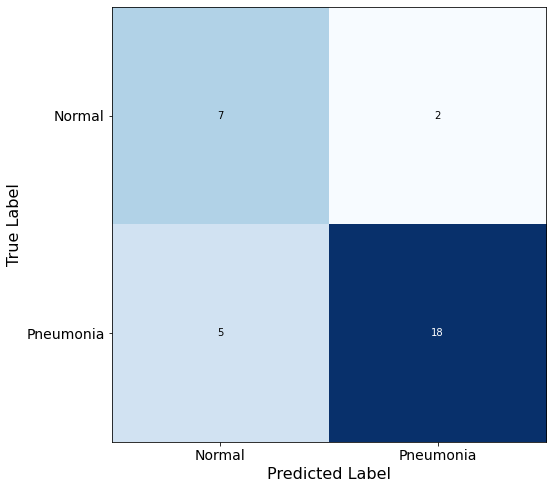

<Figure size 432x288 with 0 Axes>

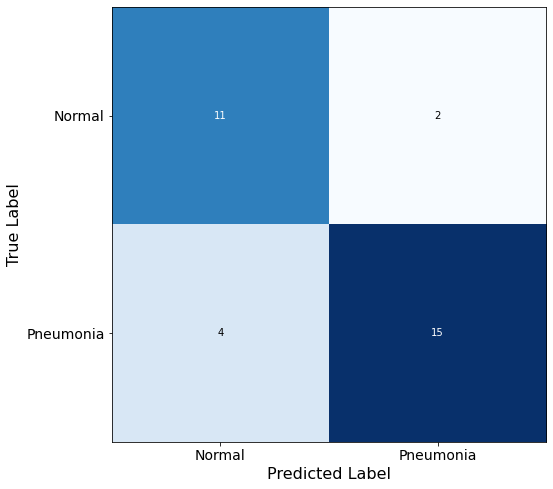

<Figure size 432x288 with 0 Axes>

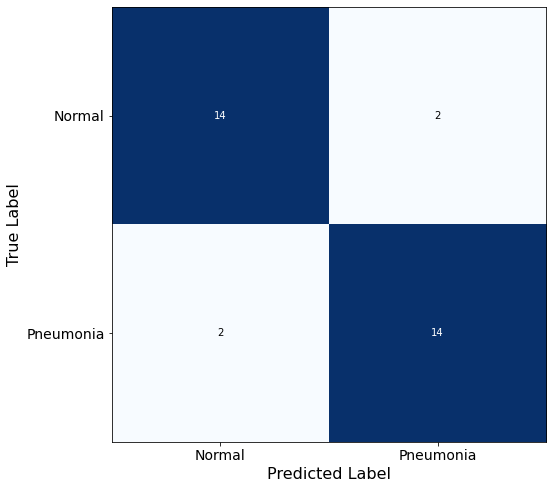

<Figure size 432x288 with 0 Axes>

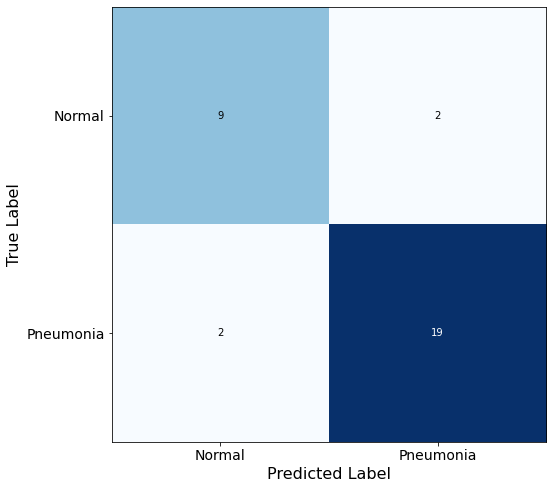

<Figure size 432x288 with 0 Axes>

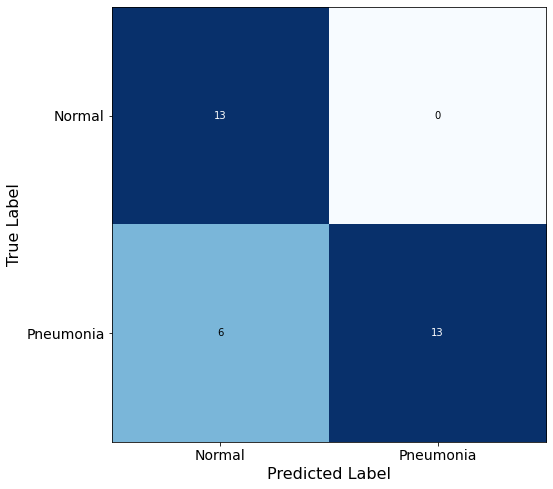

<Figure size 432x288 with 0 Axes>

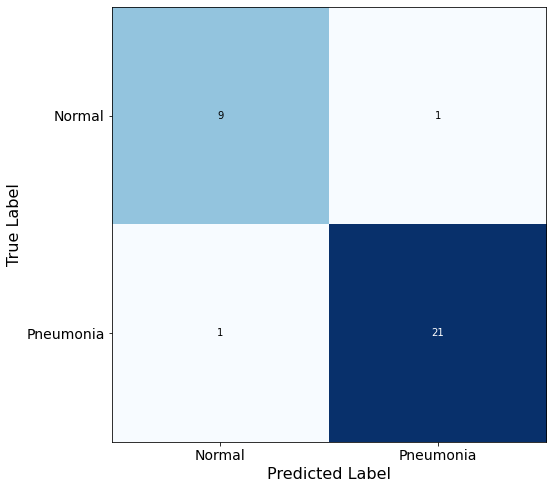

<Figure size 432x288 with 0 Axes>

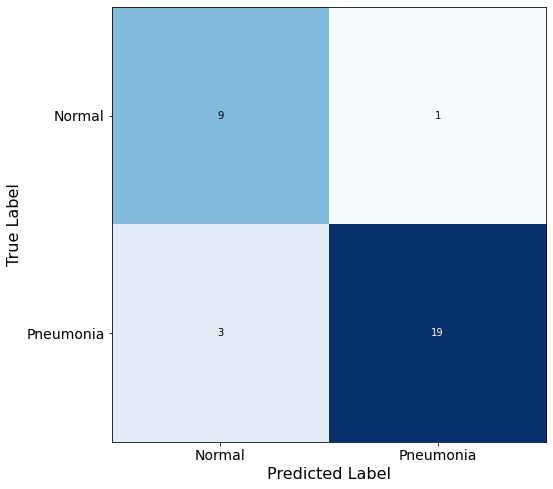

<Figure size 432x288 with 0 Axes>

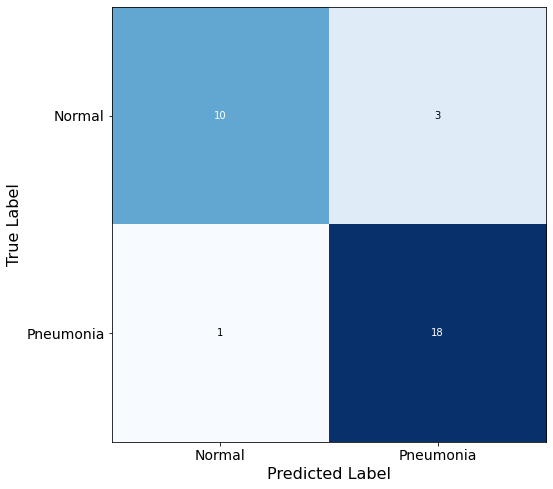

<Figure size 432x288 with 0 Axes>

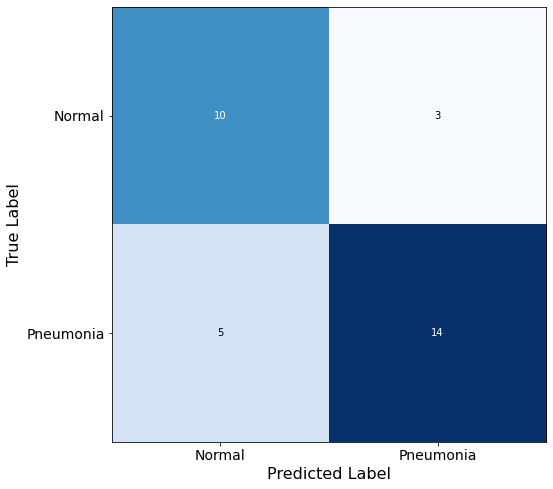

<Figure size 432x288 with 0 Axes>

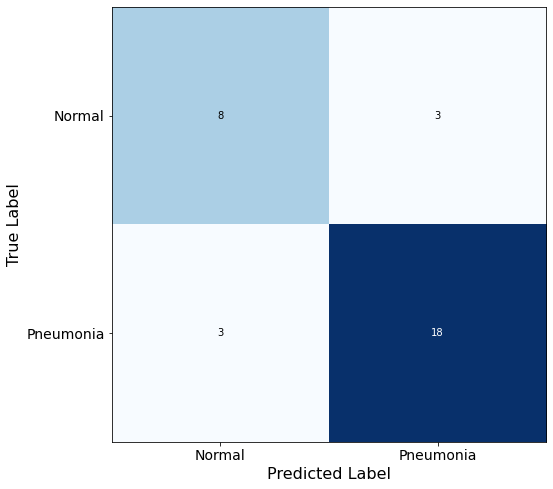

<Figure size 432x288 with 0 Axes>

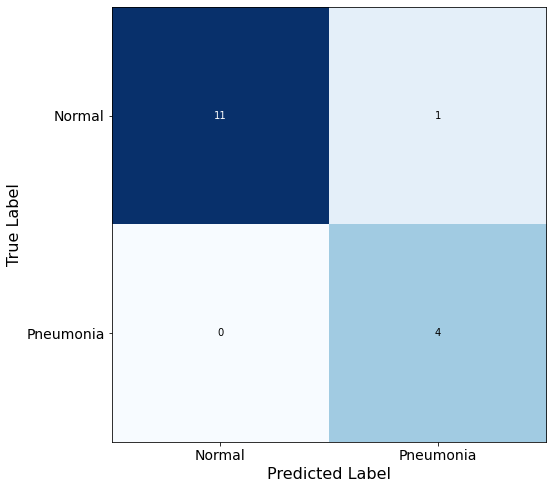

In [23]:
# 计算testloader
precisions = []
recalls = []
f1s = []
accuracies = []

with torch.no_grad():
    model.eval()
    for datas, labels in dataloaders['test']:
        datas, labels = datas.to(device), labels.to(device)
        # 预测输出
        outputs = model(datas)
        # 计算metrics
        precision, recall, f1 = metrics(outputs, labels)
        acc = accuracy(outputs, labels)
        # 保存结果
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
        accuracies.append(acc.item())

In [24]:
['{:.2f}%'.format(pre*100) for pre in precisions]# 精准率 precision

['95.65%',
 '86.36%',
 '83.33%',
 '84.21%',
 '83.33%',
 '94.44%',
 '88.89%',
 '86.67%',
 '95.65%',
 '90.00%',
 '88.24%',
 '87.50%',
 '90.48%',
 '100.00%',
 '95.45%',
 '95.00%',
 '85.71%',
 '82.35%',
 '85.71%',
 '80.00%']

In [25]:
['{:.2f}%'.format(r*100) for r in recalls]# 召回率 recall

['91.67%',
 '86.36%',
 '95.24%',
 '84.21%',
 '83.33%',
 '89.47%',
 '76.19%',
 '72.22%',
 '95.65%',
 '78.26%',
 '78.95%',
 '87.50%',
 '90.48%',
 '68.42%',
 '95.45%',
 '86.36%',
 '94.74%',
 '73.68%',
 '85.71%',
 '100.00%']

In [26]:
['{:.2f}%'.format(f*100) for f in f1s]# f1

['93.62%',
 '86.36%',
 '88.89%',
 '84.21%',
 '83.33%',
 '91.89%',
 '82.05%',
 '78.79%',
 '95.65%',
 '83.72%',
 '83.33%',
 '87.50%',
 '90.48%',
 '81.25%',
 '95.45%',
 '90.48%',
 '90.00%',
 '77.78%',
 '85.71%',
 '88.89%']

In [27]:
['{:.2f}%'.format(a*100) for a in accuracies]# 准确率 accuracy

['90.62%',
 '81.25%',
 '84.38%',
 '81.25%',
 '81.25%',
 '90.62%',
 '78.12%',
 '78.12%',
 '93.75%',
 '78.12%',
 '81.25%',
 '87.50%',
 '87.50%',
 '81.25%',
 '93.75%',
 '87.50%',
 '87.50%',
 '75.00%',
 '81.25%',
 '93.75%']